In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import  seaborn as sns
sns.set_style("darkgrid")

from Utils import *
from ExperientalTools import *

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
%reload_ext autoreload
%autoreload 2

In [23]:
# (tr_x,tr_y), (vl_x,vl_y), (ts_x,ts_y) = prepare_dataset(train_path="datasets/ML-CUP21-TR.csv")
(tr_x,tr_y) = prepare_dataset(train_path="datasets/ML-CUP21-TR.csv",unique=True)

# JUST AN EXAMPLE

## Optimal solution

In [24]:
resevoir = np.random.uniform(-1, 1,(250,10))

In [25]:
H = sigmoid(resevoir@tr_x)

In [26]:
w_star,_,_,_ = np.linalg.lstsq(H.T, tr_y.T,rcond=-1)

In [27]:
MSE(w_star.T@H,tr_y)

1.2095295996949622

## CONSTANTS

In [51]:
SIZE_RESERVOIR = 250
LAMBDA_REG = 1e-02
MAX_ITER = 500
PRECISION = 1e-04
LEARNING_RATE = 0 # 1/(L+tau) will be chosen 

In [58]:
condition_number = np.linalg.cond(H)
print(f"Condition number of H: {condition_number}")

Condition number of H: 3917.0062798015224


## EXPERIMENTS

In [52]:
model = fit_cholesky(tr_x,tr_y, hidden=SIZE_RESERVOIR, lambda_=LAMBDA_REG, activation=sigmoid, resevoir=resevoir)

In [53]:
get_results(model,tr_x,tr_y)

1.222223878744749

In [54]:
instance1 = fit_sgd(tr_x, tr_y, hidden=SIZE_RESERVOIR, lambda_=LAMBDA_REG, activation=sigmoid,
                    max_inters=MAX_ITER, eps=PRECISION, lr=LEARNING_RATE, beta=0, resevoir=resevoir, w_star=w_star.T)

instance2 = fit_sgd(tr_x, tr_y, hidden=SIZE_RESERVOIR, lambda_=LAMBDA_REG, activation=sigmoid,
                    max_inters=MAX_ITER, eps=PRECISION, lr=LEARNING_RATE, beta=0.5, resevoir=resevoir, w_star=w_star.T)  

instance3 = fit_fista(tr_x, tr_y, hidden=SIZE_RESERVOIR, lambda_=LAMBDA_REG, activation=sigmoid,
                      max_inters=MAX_ITER, eps=PRECISION, resevoir=resevoir, w_star=w_star.T)

Relative Error on Input

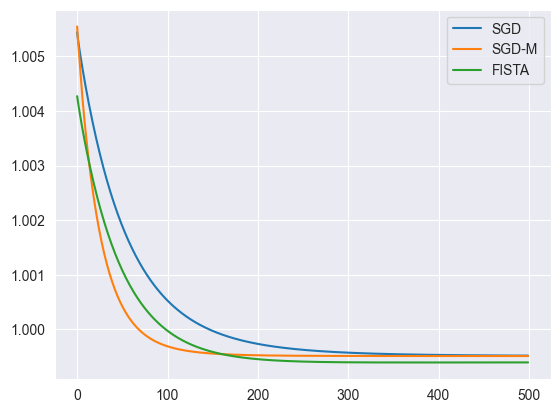

In [55]:
plt.plot(instance1[1]["Gap"],label="SGD")
plt.plot(instance2[1]["Gap"],label="SGD-M")
plt.plot(instance3[1]["Gap"],label="FISTA")
plt.legend()
plt.show()

Relative Error on Output

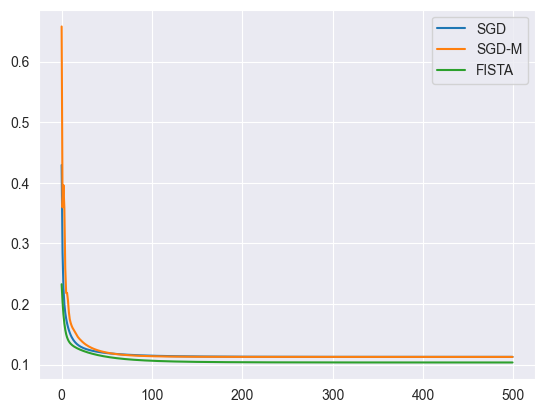

In [56]:
plt.plot(instance1[1]["Output Gap"],label="SGD")
plt.plot(instance2[1]["Output Gap"],label="SGD-M")
plt.plot(instance3[1]["Output Gap"],label="FISTA")
plt.legend()
plt.show()

In [57]:
print(f"MSE at the last iteration:\nSGD {instance1[2]}\nSGD-M {instance2[2]}\nFISTA {instance3[2]}")

MSE at the last iteration:
SGD 3.0497
SGD-M 3.0493
FISTA 2.5715


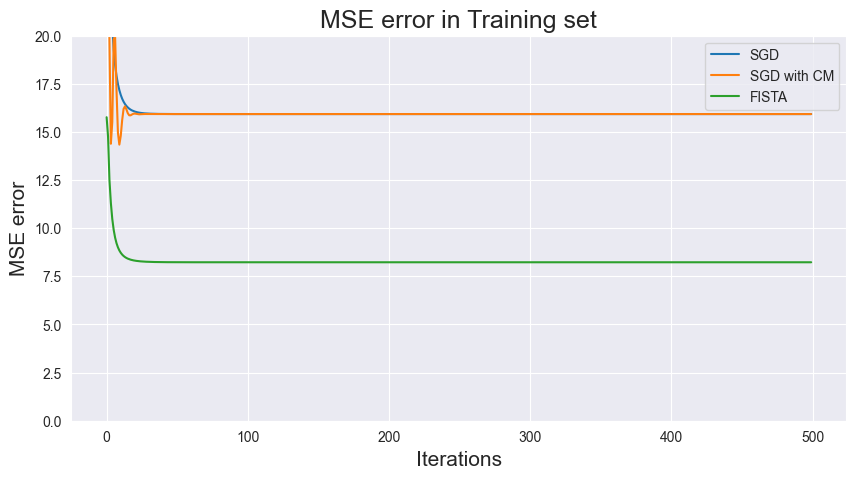

In [50]:
f, axs = plt.subplots(figsize=(10,5))
sns.lineplot(data=instance1[1], x=instance1[1].index, y="MSE_error", ax=axs, label="SGD")
sns.lineplot(data=instance2[1], x=instance2[1].index, y="MSE_error", ax=axs, label="SGD with CM")
sns.lineplot(data=instance3[1], x=instance3[1].index, y="MSE_error", ax=axs, label="FISTA")
axs.set_ylim([0,20])
axs.set_title("MSE error in Training set",fontsize=18)
axs.set_ylabel("MSE error",fontsize=15)
axs.set_xlabel("Iterations",fontsize=15)
axs.legend()
plt.show()

# GRIDSEARCH CHOLESKY

In [13]:
parameter_cholesky = dict(
    hidden=[*range(10,500,10)],
    lambda_ =  [0.001,0.0005],
    activation = [sigmoid, ReLU, tanH]
)

In [14]:
# grid_search_cholesky(configs=parameter_cholesky, train=(tr_x,tr_y), valid=(vl_x,vl_y))

# GRIDSEARCH FISTA

In [15]:
parameter_fista = dict(
    hidden=[*range(10,500,15)],
    lambda_ =  [0.0005],
    activation = [sigmoid],
    max_inters=[1000, 5000],
    eps=[0]
)

In [16]:
# grid_search_iterative(configs=parameter_fista, train=(tr_x,tr_y), valid=(vl_x,vl_y), optimizer="FISTA")

# GRIDSEARCH SDG

In [17]:
parameter_sgd = dict(
    hidden=[*range(10,500,15)],
    lambda_ =  [0.0005],
    activation = [sigmoid],
    max_inters=[1000],
    eps=[0],
    lr=[0],
    beta=[0]
)

In [18]:
# grid_search_iterative(configs=parameter_sgd, train=(tr_x,tr_y), valid=(vl_x,vl_y), optimizer="SGD")

# GRIDSEARCH SGD with CLASSICAL MOMENTUM

In [19]:
parameter_sgd = dict(
    hidden=[*range(10,500,15)],
    lambda_ =  [0.0005],
    activation = [sigmoid],
    max_inters=[1000],
    eps=[0],
    lr=[0],
    beta=[0.99]
)

In [20]:
# grid_search_iterative(configs=parameter_sgd, train=(tr_x,tr_y), valid=(vl_x,vl_y), optimizer="SGD")